# imports

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import time 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

## Student Dataset - Grade Point predict

In [4]:
X = np.load('data/student_grades/X.npy')
y = np.load('data/student_grades/y.npy')

In [6]:
def my_train_test_split(X, y, test_size=0.2):
    n = X.shape[0]
    test_len = int(n * test_size)
    train_len = n - test_len
    mask = np.random.permutation(np.arange(n))
    X, y = X[mask], y[mask]
    X_train = X[:train_len]
    y_train = y[:train_len]
    X_test = X[train_len:]
    y_test = y[train_len:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 58), (79, 58), (316,), (79,))

In [33]:
def my_acc(y_test , y_pred):
    return {'mse' : np.sqrt(np.mean((y_test - y_pred)**2)) , 
            'mae' : np.mean(np.abs((y_test - y_pred))),
    }

# KNN Using Brute Force

$$
\text{Time} = \textrm{O}(nd)
$$

In [34]:
def knn_implement1(k, X_new ,X_train, y_train):
    dist = []
    for i in range(X_train.shape[0]):
        dist.append(np.linalg.norm(X_new - X_train[i]))
    mask = np.argsort(dist)[:k]
    y_nearest = y_train[mask]
    return np.median(y_nearest)

def knn_implement2(k, X_new ,X_train, y_train):
    import heapq
    dist = []
    for i in range(X_train.shape[0]):
        dist.append(np.linalg.norm(X_new - X_train[i]))
    k_nearest = heapq.nsmallest(k, range(len(dist)), dist.__getitem__)
    y_nearest = y_train[k_nearest]
    return np.median(y_nearest)


def knn_version_1(k , X_train, y_train, X_test , implementation = 1, verbose = False):
    y_pred = []
    for i in range(X_test.shape[0]):
        if i % 10 == 0 and verbose:
            print(f'progress {i/X_test.shape[0]*100:.2f}%')
        if implementation == 1:
            y_pred.append(knn_implement1(k, X_test[i], X_train, y_train))
        else:
            y_pred.append(knn_implement2(k, X_test[i], X_train, y_train))
    return np.array(y_pred)

sorting implementation

In [35]:
X_test_100 = X_test[:100]
y_test_100 = y_test[:100]

In [ ]:
start_time = time.time()
y_kkn1 = knn_version_1(3, X_train, y_train, X_test_100, implementation = 1 , verbose = True)
print('Time taken :', time.time() - start_time)

progress 0.00%
progress 12.66%
progress 25.32%
progress 37.97%
progress 50.63%
progress 63.29%
progress 75.95%
progress 88.61%
Time taken : 0.07389998435974121


In [37]:
for k,v in my_acc(y_test_100, y_kkn1).items():
    print(f'{k}\t : {v:.2f}')

mse	 : 4.42
mae	 : 3.01


In [38]:
r2_score(y_test_100, y_kkn1)

0.10100235849056616

In [69]:
print('Pred \t<- Original\n-----------------')
p = 20
for i, j in zip(y_kkn1[:p] , y_test_100[:p]):
    print(f'{i:4.2f} \t<- {j:4.2f} \t {"High Err" if abs(i - j) > 2.5 else ""}')

Pred 	<- Original
-----------------
13.00 	<- 15.00 	 
12.00 	<- 8.00 	 High Err
0.00 	<- 9.00 	 High Err
12.00 	<- 16.00 	 High Err
10.00 	<- 9.00 	 
11.00 	<- 6.00 	 High Err
14.00 	<- 15.00 	 
11.00 	<- 10.00 	 
15.00 	<- 18.00 	 High Err
11.00 	<- 0.00 	 High Err
10.00 	<- 11.00 	 
14.00 	<- 12.00 	 
14.00 	<- 14.00 	 
11.00 	<- 13.00 	 
8.00 	<- 8.00 	 
12.00 	<- 10.00 	 
10.00 	<- 10.00 	 
13.00 	<- 14.00 	 
12.00 	<- 13.00 	 
10.00 	<- 10.00 	 


<function matplotlib.pyplot.show(close=None, block=None)>

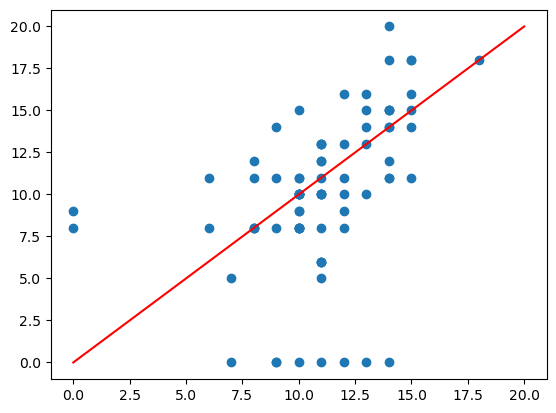

In [75]:
plt.scatter(y_kkn1, y_test_100)
plt.plot([0,20] , [0,20] , 'r')
plt.show

In [45]:
from sklearn.neighbors import KNeighborsRegressor

start_time = time.time()
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test_100)
print('Time taken :', time.time() - start_time)

KNeighborsRegressor(n_neighbors=3)

Time taken : 0.01388239860534668


In [46]:
mean_squared_error(y_test,y_pred) 
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

17.299578059071727

2.869198312236287

0.20425511006289332

<function matplotlib.pyplot.show(close=None, block=None)>

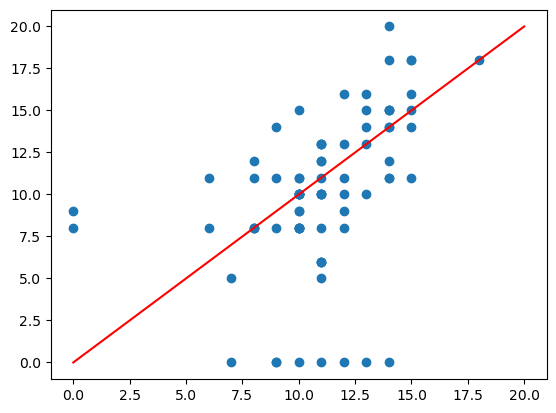

In [76]:
plt.scatter(y_kkn1, y_test_100)
plt.plot([0,20] , [0,20] , 'r')
plt.show

minheap implementation

In [77]:
start_time = time.time()
y_kkn1 = knn_version_1(3, X_train, y_train, X_test_100 , implementation = 2 , verbose = True)
print('Time taken :', time.time() - start_time) # pedda tedda em ledeee (No much difference)

progress 0.00%
progress 12.66%
progress 25.32%
progress 37.97%
progress 50.63%
progress 63.29%
progress 75.95%
progress 88.61%
Time taken : 0.10999822616577148


In [78]:
my_acc(y_test_100, y_kkn1)

{'mse': 4.420894004324053, 'mae': 3.0126582278481013}

In [ ]:
start_time = time.time()
y_kkn1 = knn_version_1(3, X_train, y_train, X_test, implementation = 2)
print('Time taken :', time.time() - start_time)

Time taken : 0.07736897468566895


### Check for entire Data

In [84]:
start_time = time.time()
y_kkn = knn_version_1(3, X_train, y_train, X_test, implementation = 1 , verbose = True)
print('Time taken :', time.time() - start_time) 
for k,v in my_acc(y_test, y_kkn).items():
    print(f'{k}\t : {v:.2f}')

progress 0.00%
progress 12.66%
progress 25.32%
progress 37.97%
progress 50.63%
progress 63.29%
progress 75.95%
progress 88.61%
Time taken : 0.06874585151672363
mse	 : 4.42
mae	 : 3.01


<function matplotlib.pyplot.show(close=None, block=None)>

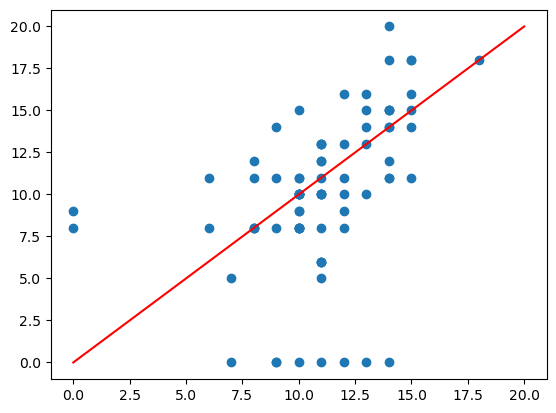

In [85]:
plt.scatter(y_kkn, y_test)
plt.plot([0,20] , [0,20] , 'r')
plt.show

In [90]:
ss_t = np.sum((y_test - np.mean(y_test))**2)
ss_n = np.sum((y_kkn - y_test)**2)
rr   = ss_n / ss_t
print(f'r2_score = {(1-rr)*100 :.2f}%')

r2_score = 10.10%
